In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
import numpy as np
import sys
import os

current_dir = os.getcwd()  # Obtient le répertoire de travail actuel
sys.path.append(os.path.abspath(os.path.join(current_dir, '../function')))


from detect_outliers import detect_outliers_iqr as do  


ModuleNotFoundError: No module named 'detect_outliers'

In [ ]:
print("Numpy version:", np.__version__)
print("Imbalanced-learn fonctionne bien !")

Numpy version: 1.26.4
Imbalanced-learn fonctionne bien !


In [ ]:
data=pd.read_csv('../data/Disease_symptom_and_patient_profile_dataset.csv')

In [ ]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
data['Fever']=data['Fever'].map({'Yes':1,'No':0})
data['Cough']=data['Cough'].map({'Yes':1,'No':0})
data['Fatigue']=data['Fatigue'].map({'Yes':1,'No':0})

In [ ]:
data['Difficulty Breathing']=data['Difficulty Breathing'].map({'Yes':1,'No':0})
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Fever']=data['Fever'].map({'Yes':1,'No':0})

bp_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
data['Blood Pressure'] = data['Blood Pressure'].map(bp_mapping)
data['Cholesterol Level'] = data['Cholesterol Level'].map(bp_mapping)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encodage label pour Disease
le = LabelEncoder()
data['Disease'] = le.fit_transform(data['Disease'])

In [ ]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,NaN,0,1,1,19,0,0,1,Positive
1,24,NaN,1,1,0,25,0,1,1,Negative
2,37,NaN,1,1,0,25,0,1,1,Negative
3,6,NaN,1,0,1,25,1,1,1,Positive
4,6,NaN,1,0,1,25,1,1,1,Positive


In [ ]:
data['Outcome Variable']=data['Outcome Variable'].map({'Positive':1,'Negative':0})

In [ ]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,NaN,0,1,1,19,0,0,1,1
1,24,NaN,1,1,0,25,0,1,1,0
2,37,NaN,1,1,0,25,0,1,1,0
3,6,NaN,1,0,1,25,1,1,1,1
4,6,NaN,1,0,1,25,1,1,1,1


In [ ]:
data.dropna(axis='columns')

,Disease,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,0,1,1,19,0,0,1,1
1,24,1,1,0,25,0,1,1,0
2,37,1,1,0,25,0,1,1,0
3,6,1,0,1,25,1,1,1,1
4,6,1,0,1,25,1,1,1,1
...,...,...,...,...,...,...,...,...,...
344,101,0,1,0,80,0,2,2,1
345,101,0,1,0,85,1,2,2,1
346,101,0,1,0,85,1,2,2,1
347,101,0,1,0,90,0,2,2,1


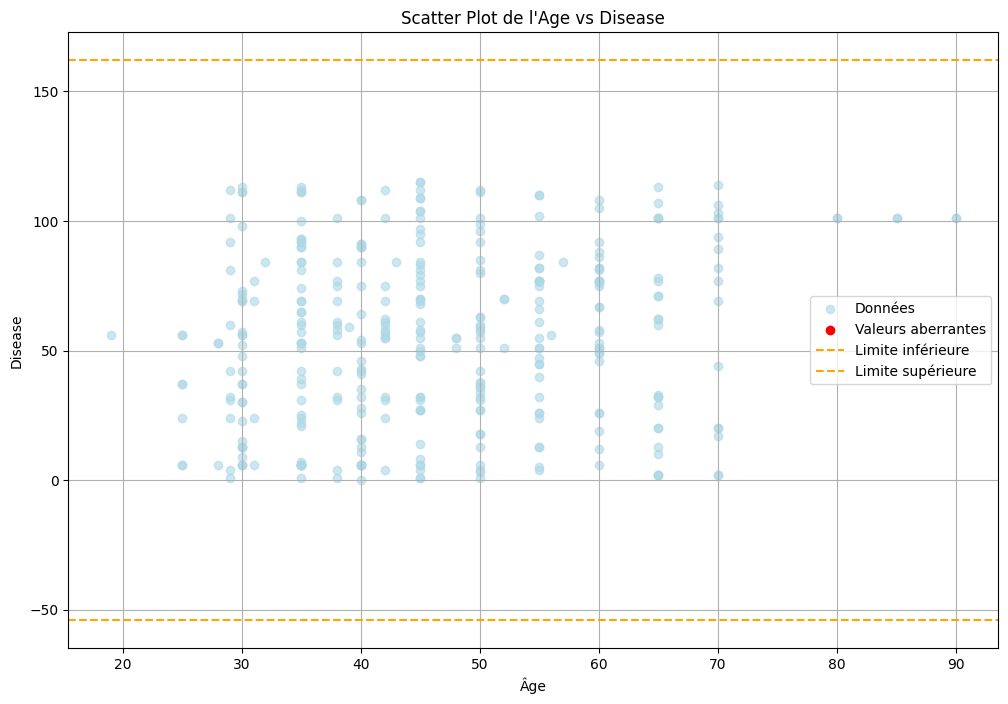

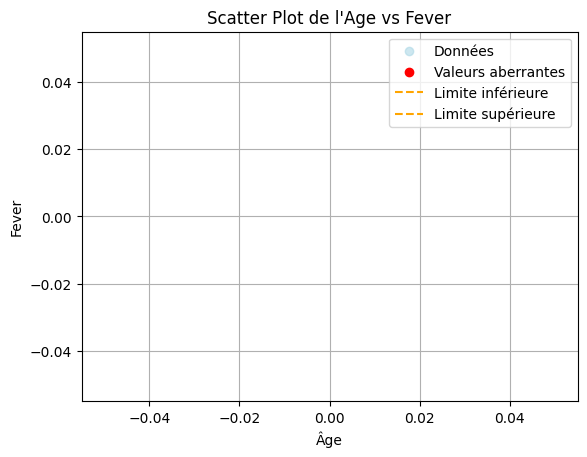

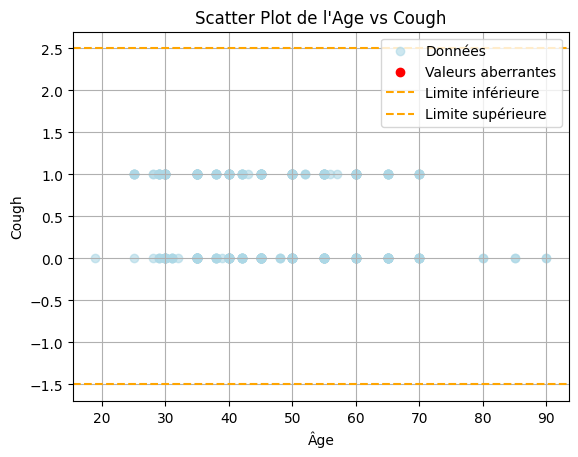

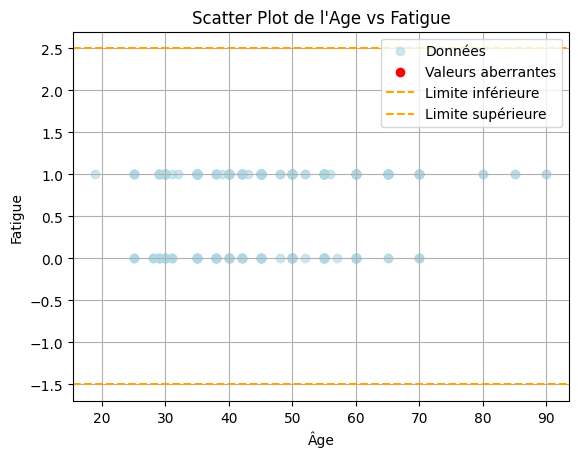

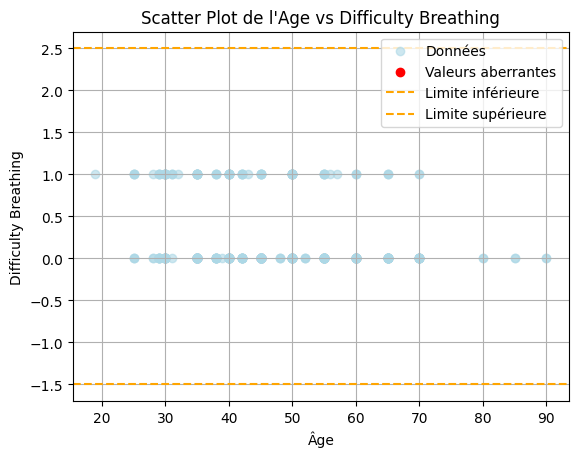

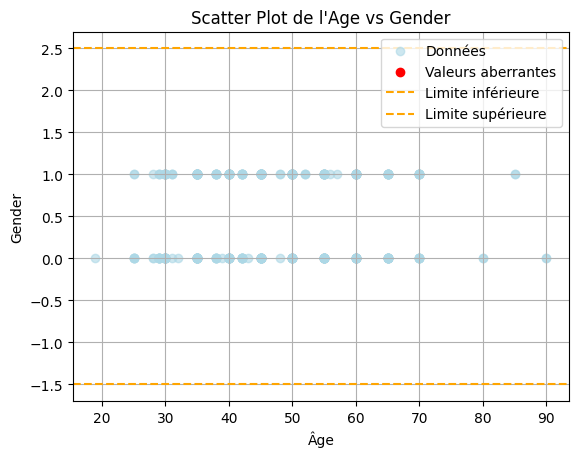

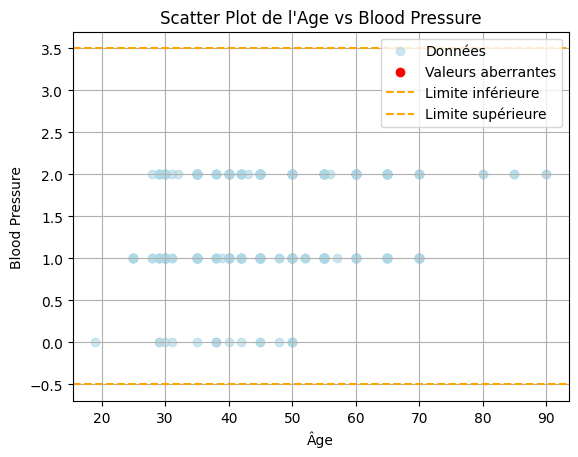

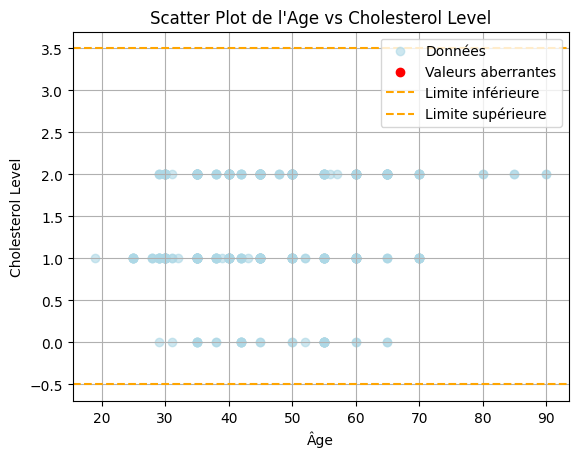

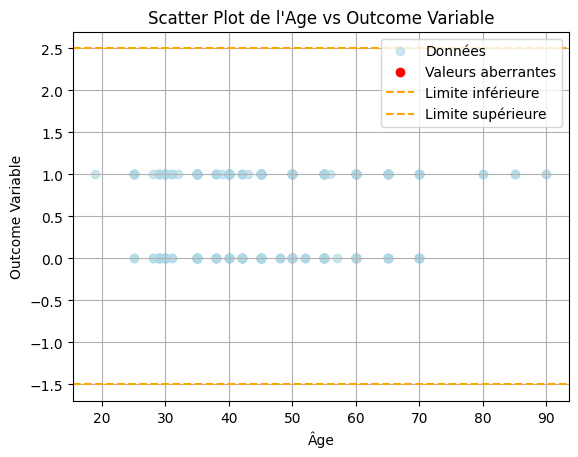

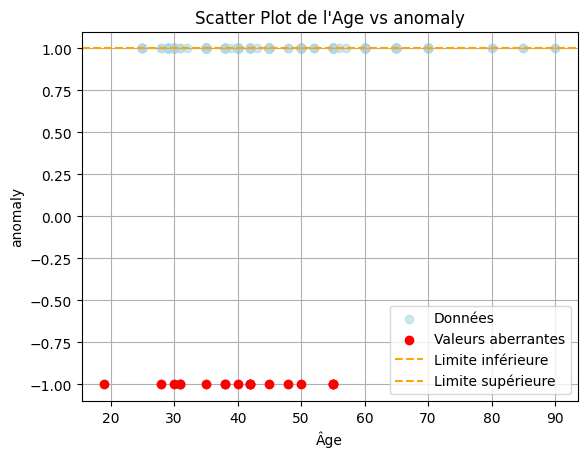

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

plt.figure(figsize=(12, 8))

for column in data.select_dtypes(include=[np.number]).columns:
    if column != 'Age':
        outliers, lower_bound, upper_bound = detect_outliers_iqr(data, column)
        
        # Scatter plot
        plt.scatter(data['Age'], data[column], color='lightblue', label='Données', alpha=0.6)

        # Afficher les valeurs aberrantes
        plt.scatter(outliers['Age'], outliers[column], color='red', label='Valeurs aberrantes', zorder=5)

        # Personnalisation du graphique
        plt.title(f'Scatter Plot de l\'Age vs {column}')
        plt.xlabel('Âge')
        plt.ylabel(column)
        plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Limite inférieure')
        plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Limite supérieure')
        plt.legend()
        plt.grid()
        plt.show()

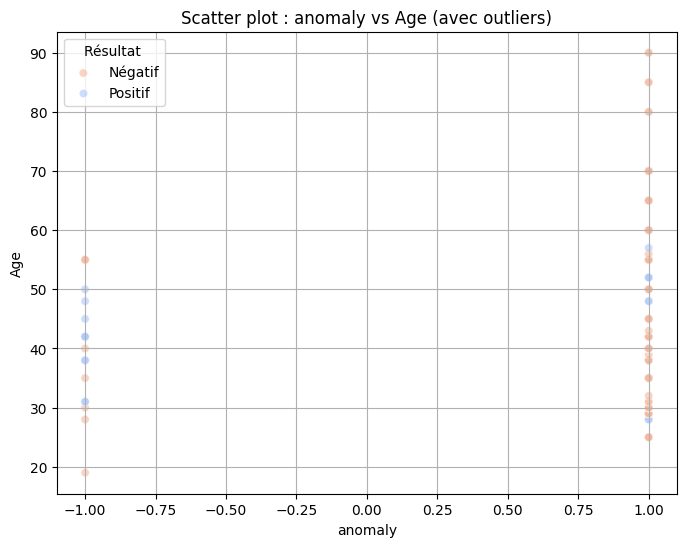

In [ ]:
# Application à toutes les colonnes
outlier_counts = {}

for col in data.columns:
    outliers = do(data, col)
    outlier_counts[col] = len(outliers)

# Affichage des colonnes ayant le plus d’outliers
outliers_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Nombre d\'outliers'])
outliers_df = outliers_df.sort_values(by="Nombre d'outliers", ascending=False)

# Récupération des deux colonnes avec le plus d'outliers
top_outliers_cols = outliers_df.head(2).index.tolist()
col_x, col_y = top_outliers_cols[0], top_outliers_cols[1]


plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=col_x, y=col_y, hue='Outcome Variable', palette='coolwarm', alpha=0.6)
plt.title(f"Scatter plot : {col_x} vs {col_y} (avec outliers)")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.legend(title="Résultat ", labels=['Négatif', 'Positif'])
plt.grid(True)
plt.show()


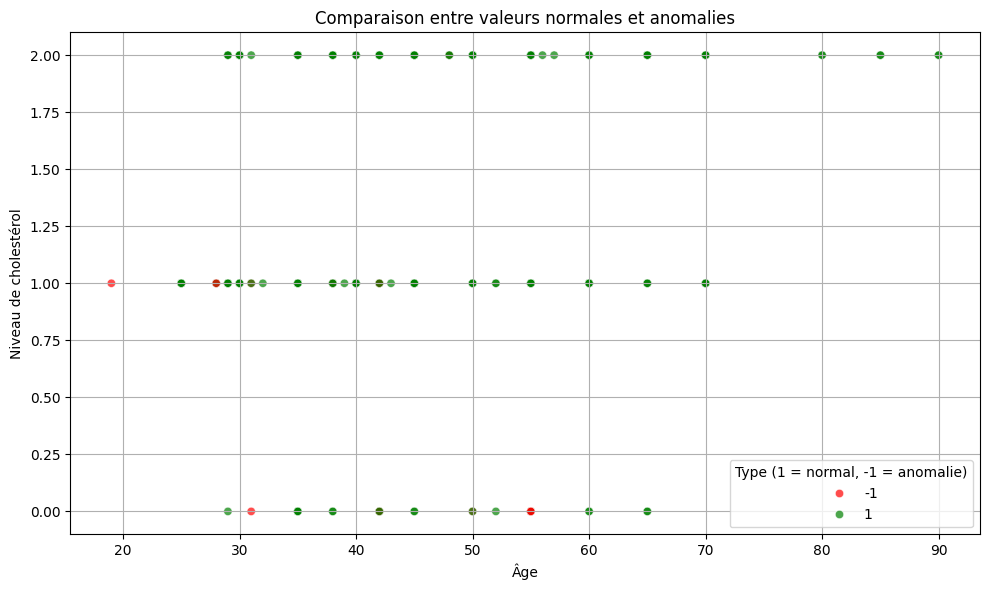

In [ ]:
# 3. Appliquer Isolation Forest

# from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data["anomaly"] = model.fit_predict(data)

# 4. Ajouter les anomalies dans le dataframe original
data["anomaly"] = data["anomaly"]

# 5. Visualisation : Age vs Cholesterol Level
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Age",
    y="Cholesterol Level",
    hue="anomaly",
    palette={1: "green", -1: "red"},
    alpha=0.7
)
plt.title("Comparaison entre valeurs normales et anomalies")
plt.xlabel("Âge")
plt.ylabel("Niveau de cholestérol")
plt.legend(title="Type (1 = normal, -1 = anomalie)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data.dropna(axis="columns")

,Disease,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,anomaly
0,56,0,1,1,19,0,0,1,1,-1
1,24,1,1,0,25,0,1,1,0,1
2,37,1,1,0,25,0,1,1,0,1
3,6,1,0,1,25,1,1,1,1,1
4,6,1,0,1,25,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
344,101,0,1,0,80,0,2,2,1,1
345,101,0,1,0,85,1,2,2,1,1
346,101,0,1,0,85,1,2,2,1,1
347,101,0,1,0,90,0,2,2,1,1


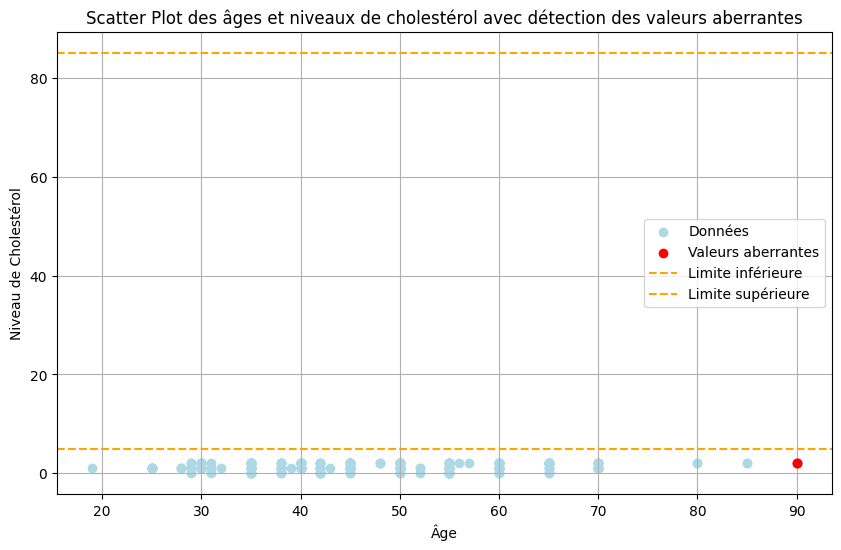

In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_age, lower_bound_age, upper_bound_age = detect_outliers_iqr(data['Age'])

# Création du scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Cholesterol Level'], color='lightblue', label='Données')
plt.scatter(outliers_age, data['Cholesterol Level'][data['Age'].isin(outliers_age)], color='red', label='Valeurs aberrantes', zorder=5)

# Ajouter des lignes pour les limites
plt.axhline(y=lower_bound_age, color='orange', linestyle='--', label='Limite inférieure')
plt.axhline(y=upper_bound_age, color='orange', linestyle='--', label='Limite supérieure')

# Personnalisation du graphique
plt.title('Scatter Plot des âges et niveaux de cholestérol avec détection des valeurs aberrantes')
plt.xlabel('Âge')
plt.ylabel('Niveau de Cholestérol')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,anomaly
0,56,NaN,0,1,1,19,0,0,1,1,-1
1,24,NaN,1,1,0,25,0,1,1,0,1
2,37,NaN,1,1,0,25,0,1,1,0,1
3,6,NaN,1,0,1,25,1,1,1,1,1
4,6,NaN,1,0,1,25,1,1,1,1,1


In [ ]:
data.dropna(axis='columns')

,Disease,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,anomaly
0,56,0,1,1,19,0,0,1,1,-1
1,24,1,1,0,25,0,1,1,0,1
2,37,1,1,0,25,0,1,1,0,1
3,6,1,0,1,25,1,1,1,1,1
4,6,1,0,1,25,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
344,101,0,1,0,80,0,2,2,1,1
345,101,0,1,0,85,1,2,2,1,1
346,101,0,1,0,85,1,2,2,1,1
347,101,0,1,0,90,0,2,2,1,1


In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder



# Encodage des colonnes catégorielles si nécessaire
df_encoded = data.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.fillna(df_encoded.mean(numeric_only=True), inplace=True)

# Standardisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


# ---------- Méthode KMeans ----------
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(df_scaled)

# Distances aux centroïdes
centroids = kmeans.cluster_centers_
distances = []
for i, point in enumerate(df_scaled):
    centroid = centroids[data['cluster'].iloc[i]]
    distances.append(np.linalg.norm(point - centroid))
data['distance_to_centroid'] = distances

# Anomalies KMeans : top 5% les plus éloignés
threshold_kmeans = np.percentile(distances, 95)
data['anomaly_kmeans'] = data['distance_to_centroid'] > threshold_kmeans

# ---------- Méthode IQR ----------
def detect_outliers_iqr(dataframe, column, k=1.5):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    return (dataframe[column] < Q1 - k*IQR) | (dataframe[column] > Q3 + k*IQR)

outliers_age = detect_outliers_iqr(data, "Age")
outliers_chol = detect_outliers_iqr(data, "Cholesterol Level")
data['anomaly_iqr'] = outliers_age | outliers_chol

# ---------- Fusion des méthodes ----------
data['anomaly_hybrid'] = data['anomaly_iqr'] | data['anomaly_kmeans']

# ---------- Affichage ----------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Age",
    y="Cholesterol Level",
    hue="anomaly_hybrid",
    palette={True: "red", False: "green"},
    alpha=0.7
)
plt.title("Détection d'anomalies Hybride (IQR + KMeans)")
plt.xlabel("Âge")
plt.ylabel("Niveau de cholestérol")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\New User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\New User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\New User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
data.dtypes

Disease                   int32
Fever                   float64
Cough                     int64
Fatigue                   int64
Difficulty Breathing      int64
Age                       int64
Gender                    int64
Blood Pressure            int64
Cholesterol Level         int64
Outcome Variable          int64
anomaly                   int32
dtype: object